# download the dataset

# load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [19]:
data=pd.read_csv(r"E:\tharshini\Mall_Customers.csv")

# Perform Below Visualizations

# Univariate Analysis

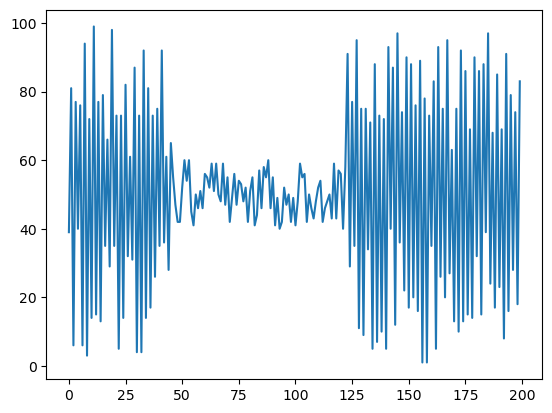

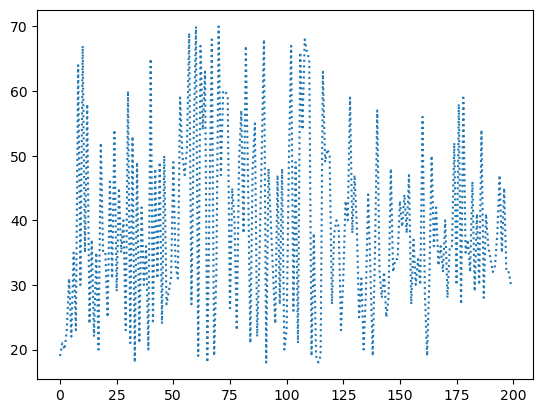

In [17]:
%matplotlib inline
plt.plot(data['Spending Score (1-100)'])
plt.show()
data=np.array(data['Age'])
plt.plot(data,linestyle = 'dotted')

D:\ibm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

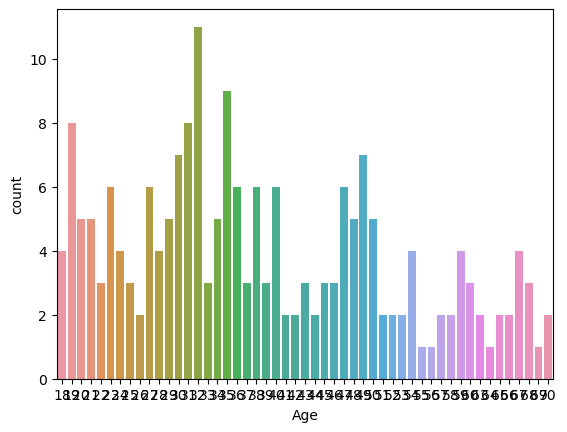

In [20]:
sns.countplot(data['Age'])

<AxesSubplot:ylabel='Density'>

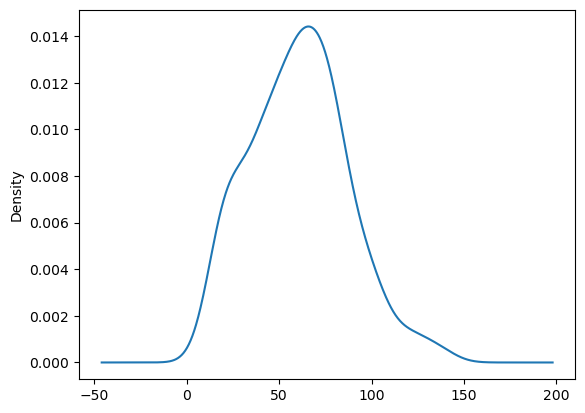

In [21]:
data['Annual Income (k$)'].plot(kind='density')

D:\ibm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

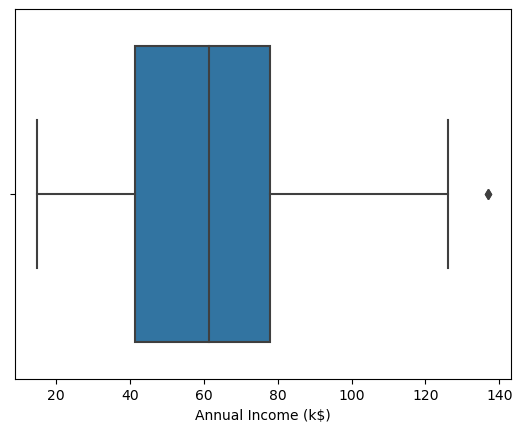

In [22]:
sns.boxplot(data['Annual Income (k$)'])

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

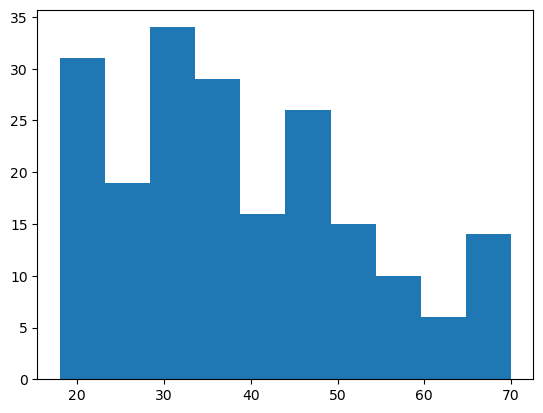

In [23]:
plt.hist(data['Age'])

# Bi- Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

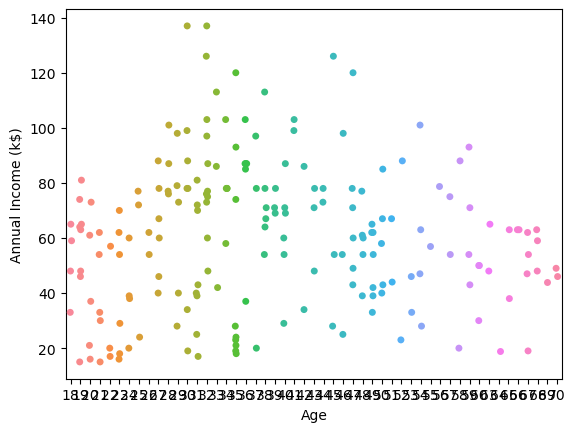

In [24]:
sns.stripplot(x=data['Age'],y=data['Annual Income (k$)'])

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

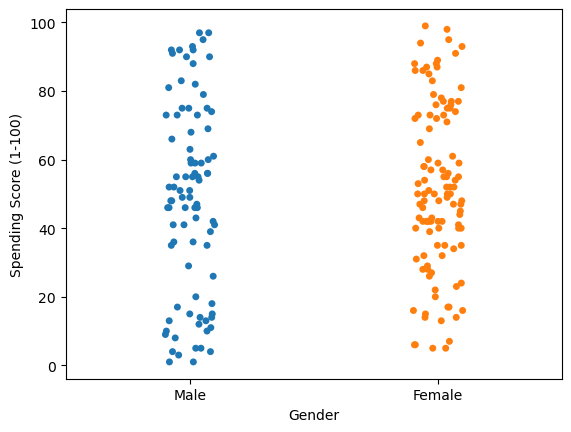

In [26]:
sns.stripplot(x=data['Gender'],y=data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

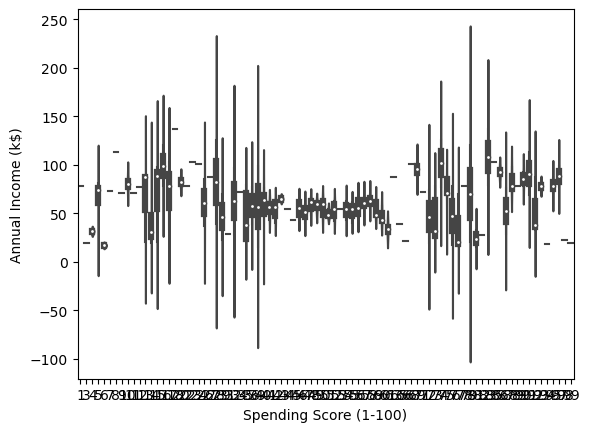

In [27]:
sns.violinplot(x ='Spending Score (1-100)', y ='Annual Income (k$)', data = data)

# Multivariate Analysis

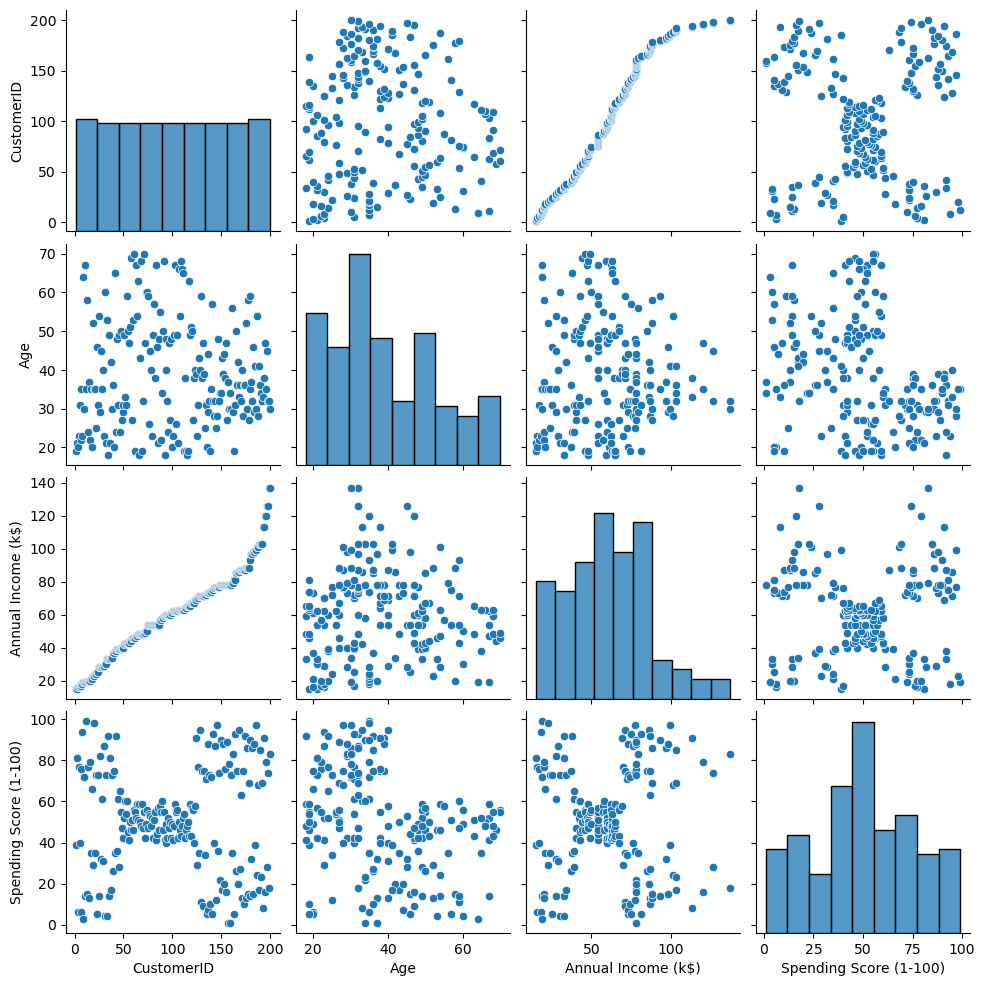

In [28]:
sns.pairplot(data)

# descriptive statistics

<AxesSubplot:>

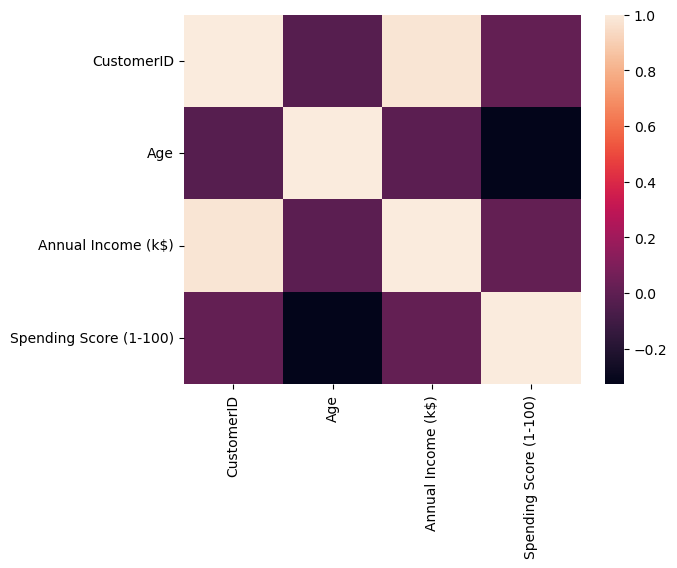

In [29]:
sns.heatmap(data.corr(),annot=False)

In [30]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [34]:
data.mean()

C:\Users\Tharshini\AppData\Local\Temp\ipykernel_11424\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [35]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [36]:
data.median()

C:\Users\Tharshini\AppData\Local\Temp\ipykernel_11424\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

# Check for Missing values

In [37]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Outliers

D:\ibm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

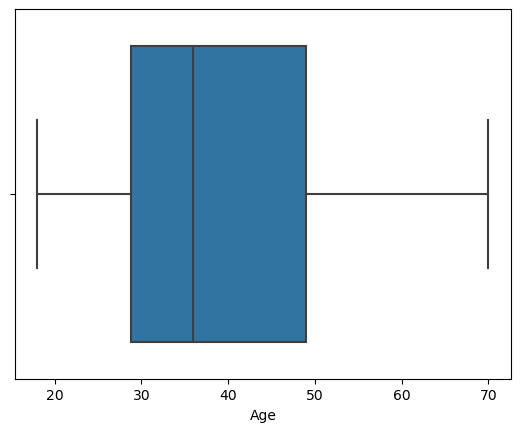

In [38]:
sns.boxplot(data['Age'])

In [39]:
Q1 = data['Age'].quantile(0.15)
Q3 = data['Age'].quantile(0.25)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Age']=np.where(data['Age']>upper_whisker,upper_whisker,np.where(data['Age']<lower_whisker,lower_whisker,data['Age']))


D:\ibm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

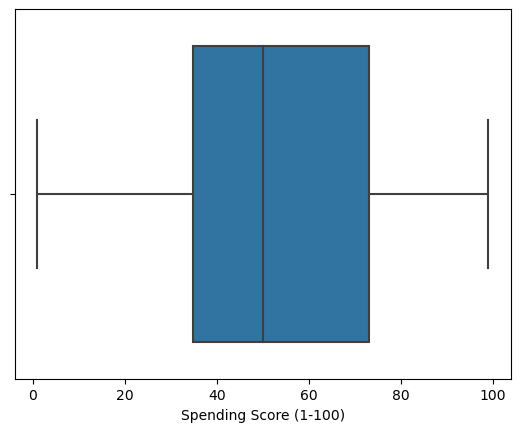

In [40]:
sns.boxplot(data['Spending Score (1-100)'])

In [41]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [42]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['Gender'])
data["Gender"] = label

In [44]:
data['CustomerID'].value_counts()

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64

In [48]:
X = data.drop("CustomerID",axis=1)
Y = data['Spending Score (1-100)']

In [49]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[ 1.12815215 -2.11853528 -1.73899919 -0.43480148]
 [ 1.12815215 -1.80137444 -1.73899919  1.19570407]
 [-0.88640526 -1.95995486 -1.70082976 -1.71591298]
 [-0.88640526 -1.48421361 -1.70082976  1.04041783]
 [-0.88640526 -0.21557026 -1.66266033 -0.39597992]
 [-0.88640526 -1.64279402 -1.66266033  1.00159627]
 [-0.88640526  0.41875142 -1.62449091 -1.71591298]
 [-0.88640526 -1.48421361 -1.62449091  1.70038436]
 [ 1.12815215  0.79537991 -1.58632148 -1.83237767]
 [-0.88640526 -0.37415068 -1.58632148  0.84631002]
 [ 1.12815215  0.79537991 -1.58632148 -1.4053405 ]
 [-0.88640526  0.41875142 -1.58632148  1.89449216]
 [-0.88640526  0.79537991 -1.54815205 -1.36651894]
 [-0.88640526 -1.32563319 -1.54815205  1.04041783]
 [ 1.12815215  0.73591226 -1.54815205 -1.44416206]
 [ 1.12815215 -1.64279402 -1.54815205  1.11806095]
 [-0.88640526  0.41875142 -1.50998262 -0.59008772]
 [ 1.12815215 -1.95995486 -1.50998262  0.61338066]
 [ 1.12815215  0.79537991 -1.43364376 -0.82301709]
 [-0.88640526  0.41875142 -1.43

In [51]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-2.118535,-1.738999,-0.434801
1,1.128152,-1.801374,-1.738999,1.195704
2,-0.886405,-1.959955,-1.700830,-1.715913
3,-0.886405,-1.484214,-1.700830,1.040418
4,-0.886405,-0.215570,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,0.418751,2.268791,1.118061
196,-0.886405,0.795380,2.497807,-0.861839
197,1.128152,-0.056990,2.497807,0.923953
198,1.128152,-0.056990,2.917671,-1.250054


# train test split

In [52]:
from sklearn.model_selection import train_test_split

# split the dataset

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)
X_train.shape

(160, 4)

In [54]:
X_test.shape

(40, 4)

In [55]:
Y_train.shape

(160,)

In [56]:
Y_test.shape

(40,)

# Clustering Algorithm

In [57]:
x = data.iloc[:, [3, 4]].values 

In [58]:
from sklearn.cluster import KMeans  
wcss_list= []

D:\ibm\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


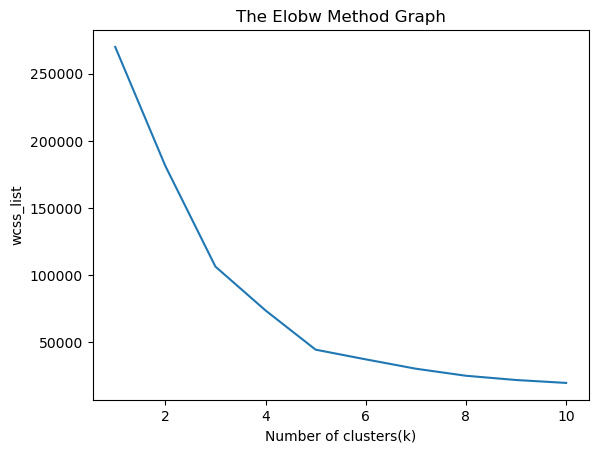

In [59]:
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

# training the K-means model on a dataset

In [60]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

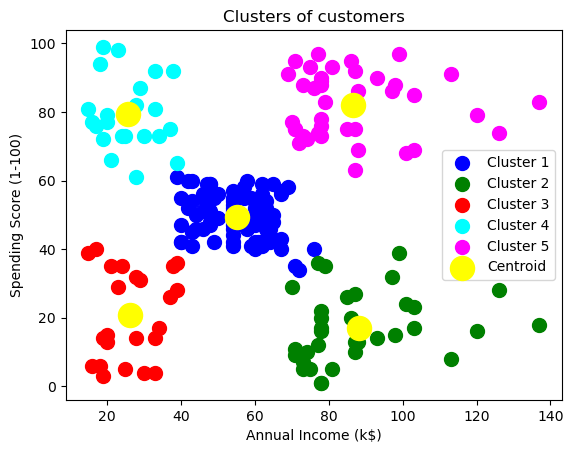

In [61]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show() 